<a href="https://colab.research.google.com/github/dlbferreira/python-for-data-science-and-machine-learning/blob/main/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seaborn**

http://seaborn.pydata.org/



In [1]:
import seaborn as sns

In [2]:
%matplotlib inline


**Data**

Seaborn comes with built-in data sets!

In [28]:
tips = sns.load_dataset('tips')

In [29]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
flights = sns.load_dataset('flights')

In [63]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [95]:
iris = sns.load_dataset('iris')

In [96]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **Distribution Plots**

**distplot**

The distplot shows the distribution of a univariate set of observations.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


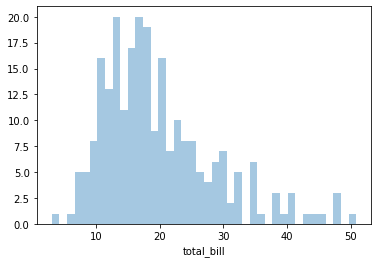

In [10]:
#sns.distplot(tips['total_bill'])
sns.distplot(tips['total_bill'], kde=False,bins=40)

**jointplot()**

Allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare with:
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

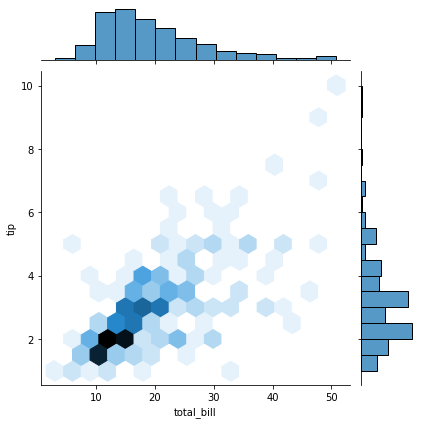

In [18]:
#sns.jointplot(x='total_bill',y='tip',data=tips)
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

**pairplot**

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

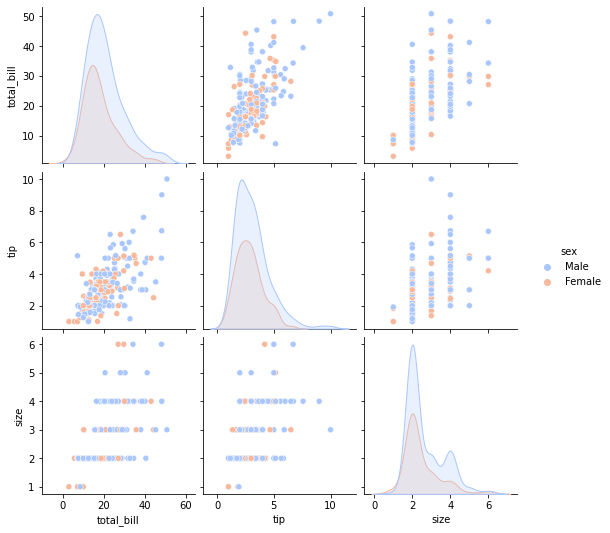

In [21]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

**rugplot**

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

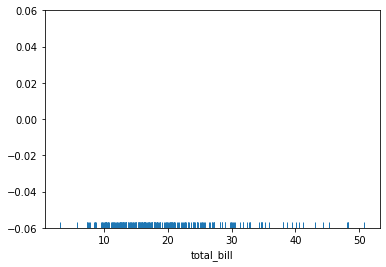

In [22]:
sns.rugplot(tips['total_bill'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


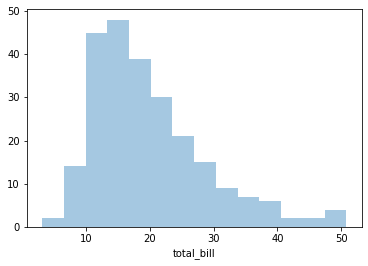

In [23]:
sns.distplot(tips['total_bill'],kde=False)


**kdeplot**

kdeplots are Kernel Density Estimation plots. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

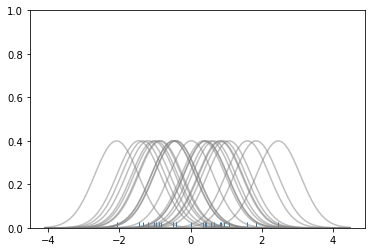

In [24]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

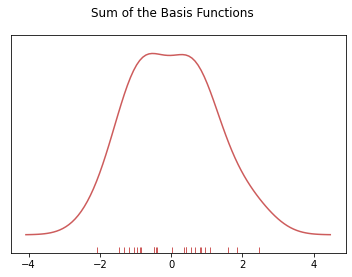

In [25]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

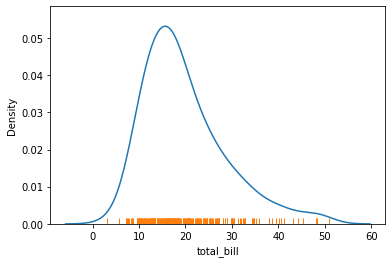

In [26]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

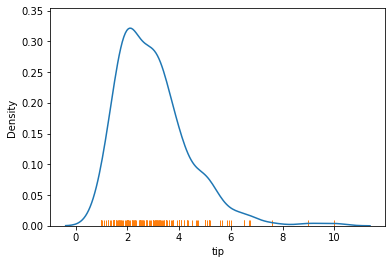

In [27]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

## **Categorical Plots**

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

**barplot and countplot**

These very similar plots allow you to get aggregate data off a categorical feature in your data. barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:



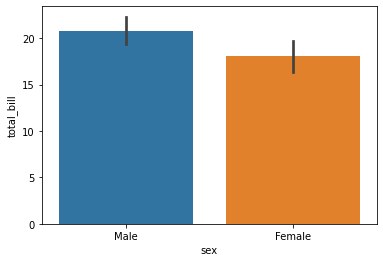

In [34]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [31]:
import numpy as np

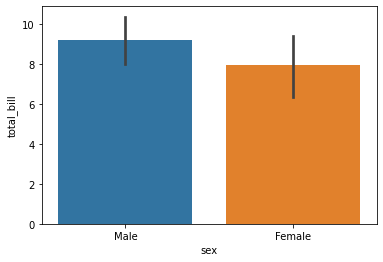

In [32]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

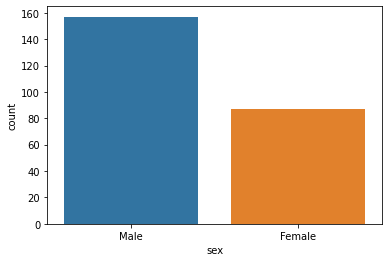

In [33]:
sns.countplot(x='sex',data=tips)

**boxplot and violinplot**

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

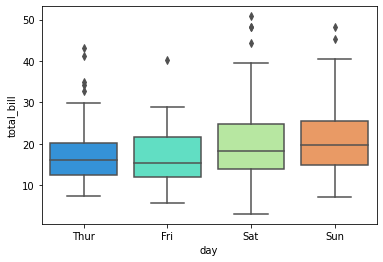

In [39]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')
#sns.boxplot(x="day", y="total_bill", data=tips,hue='smoker')

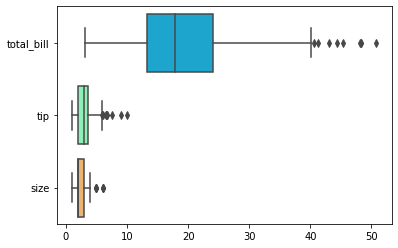

In [46]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

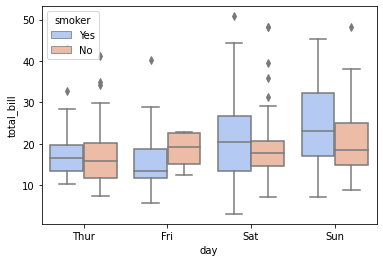

In [47]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

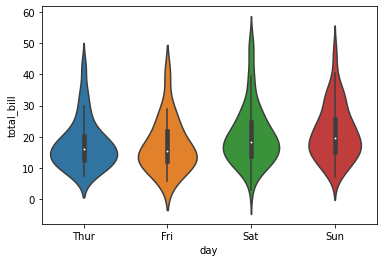

In [49]:
sns.violinplot(x="day", y="total_bill", data=tips)

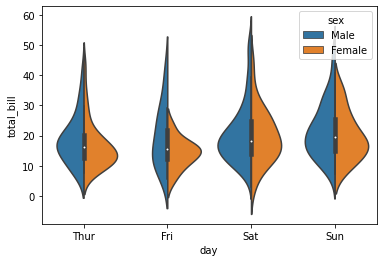

In [50]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex',split=True)

**stripplot and swarmplot**

The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.
The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

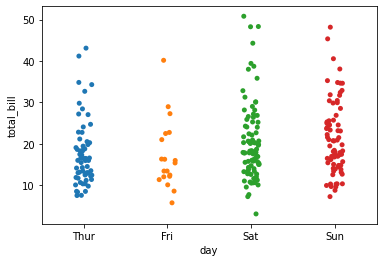

In [51]:
sns.stripplot(x="day", y="total_bill", data=tips)

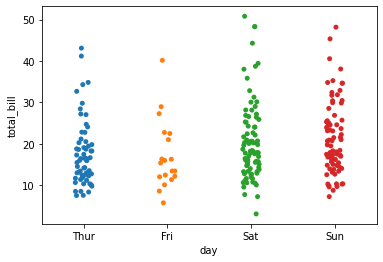

In [52]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


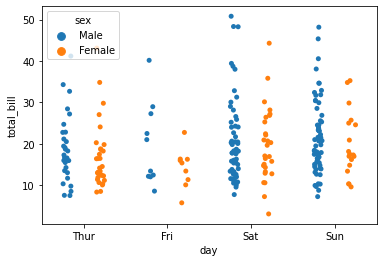

In [54]:
#sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, hue='sex')
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, hue='sex',split=True)

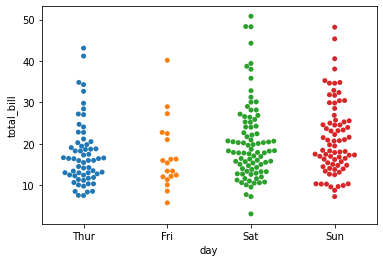

In [55]:
sns.swarmplot(x="day", y="total_bill", data=tips)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


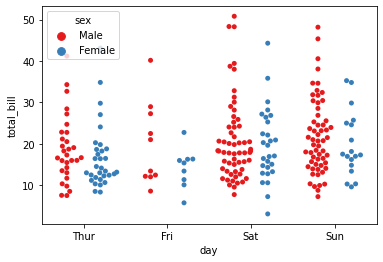

In [56]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

**Combining Categorical Plots**

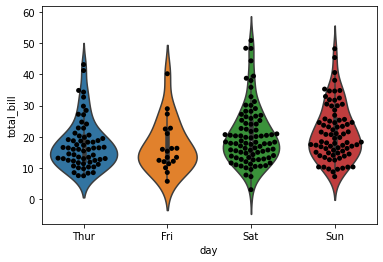

In [57]:
sns.violinplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips,color='black')

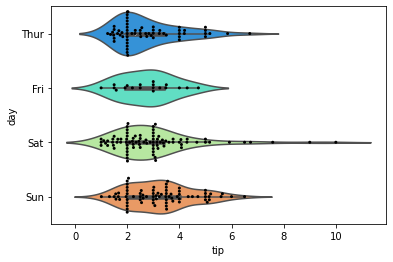

In [58]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

**factorplot**

factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


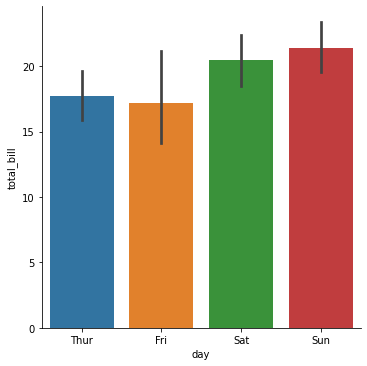

In [60]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


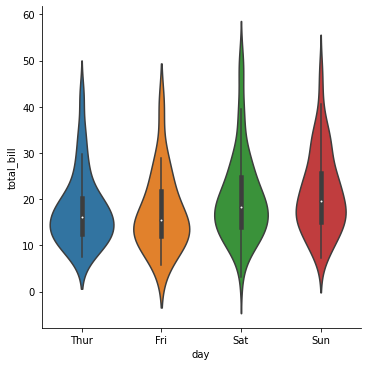

In [61]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='violin')

## **Matriz Plots**

**Heatmap**

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you.

In [76]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


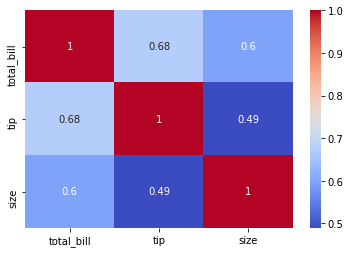

In [75]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [81]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

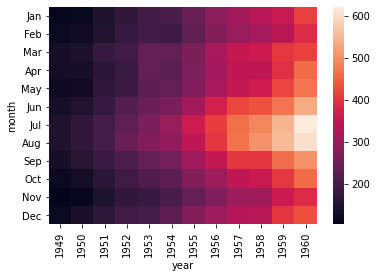

In [82]:
sns.heatmap(fp)

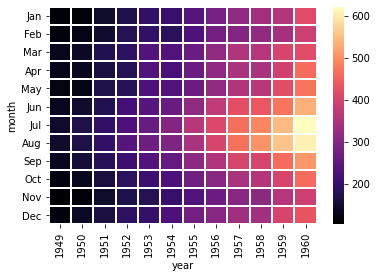

In [83]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

**clustermap**

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap.

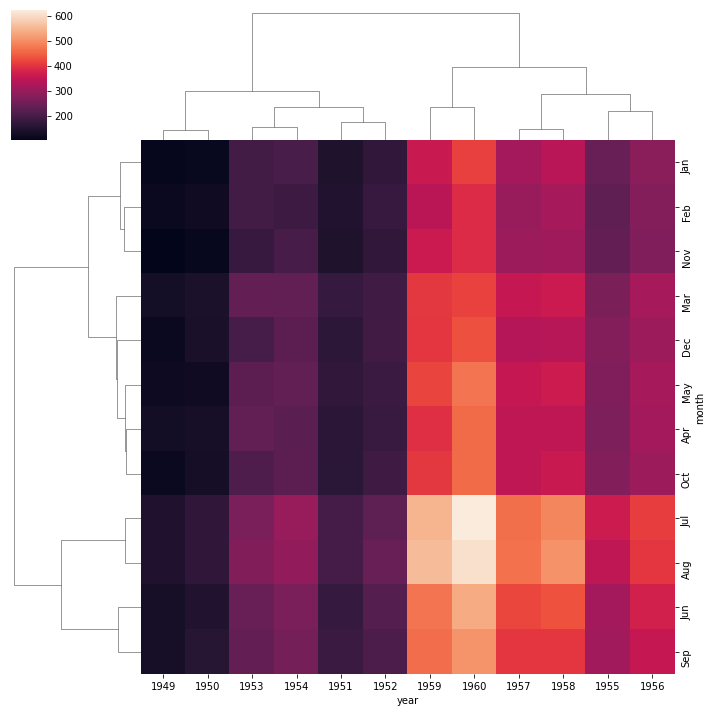

In [85]:
sns.clustermap(fp)

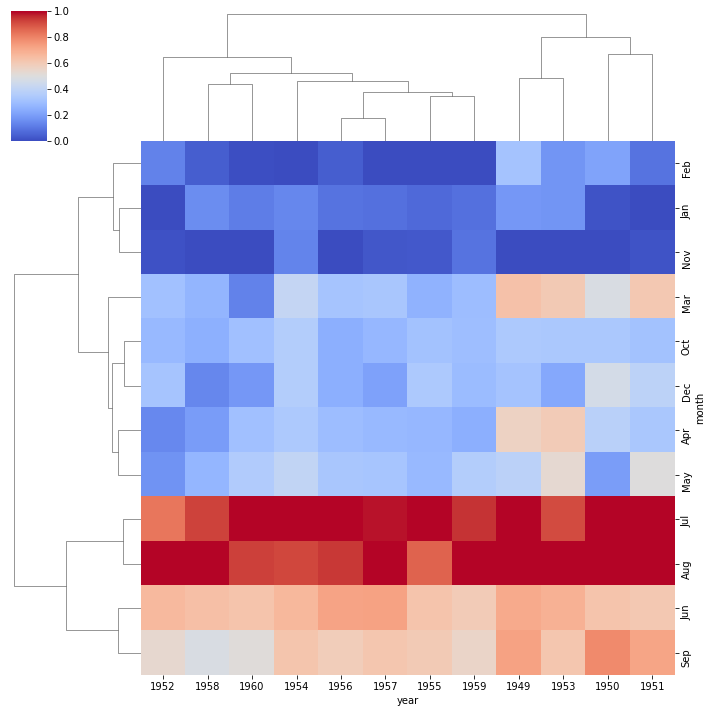

In [87]:
# More options to get the information a little clearer like normalization
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

## **Grids**

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

**PairGrid**

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

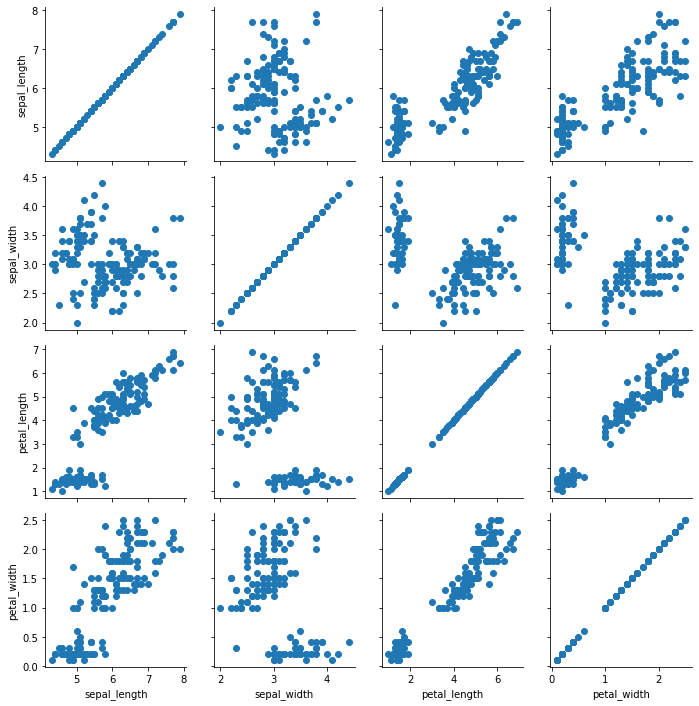

In [104]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

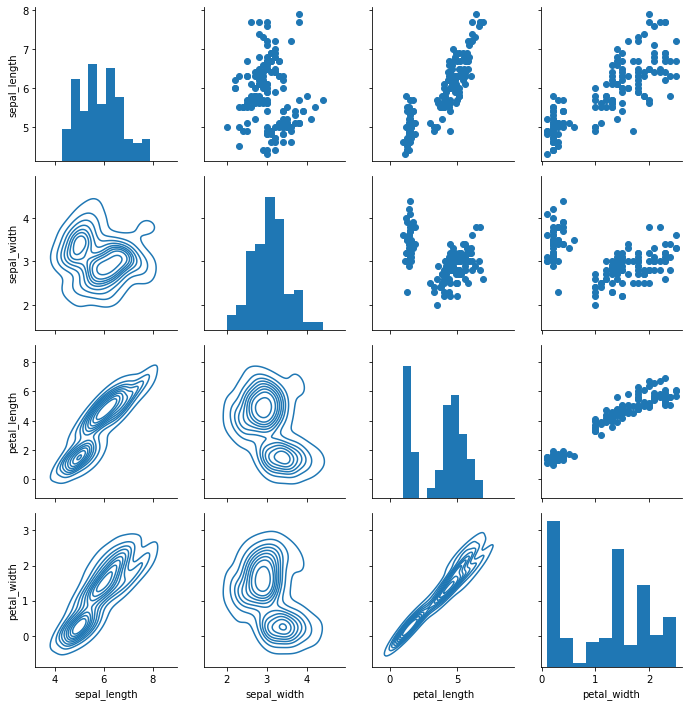

In [105]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

**paiplot**

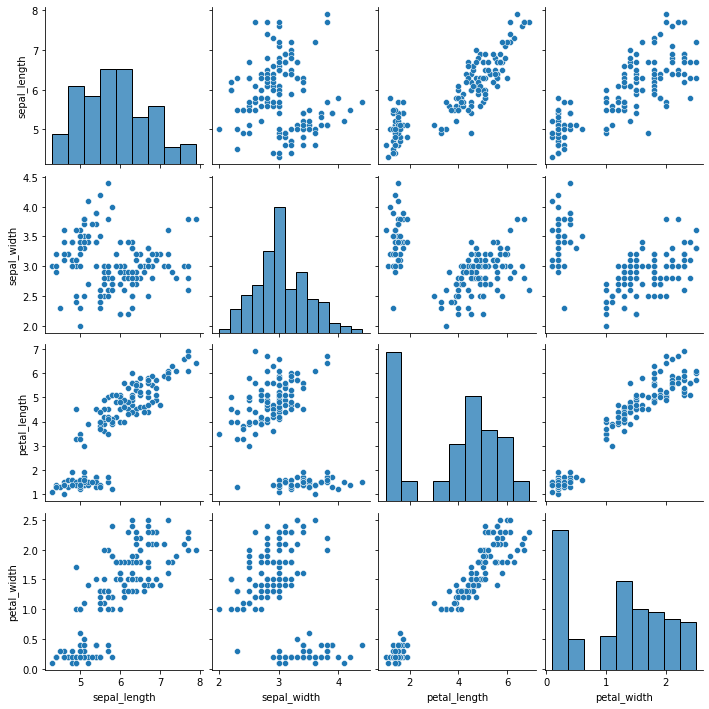

In [120]:
sns.pairplot(iris)

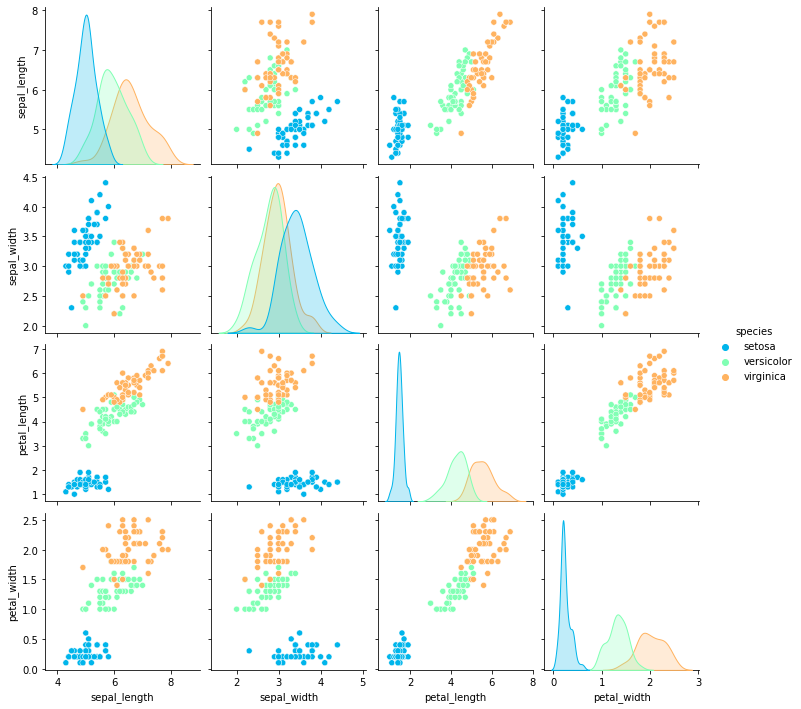

In [119]:
sns.pairplot(iris,hue='species',palette='rainbow')

**FacetGrid**

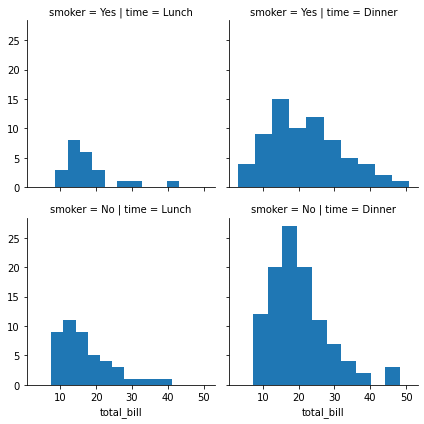

In [125]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

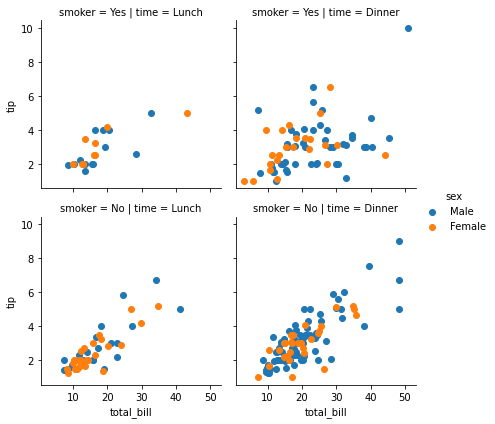

In [126]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

**JointGrid**

JointGrid is the general version for jointplot() type grids.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


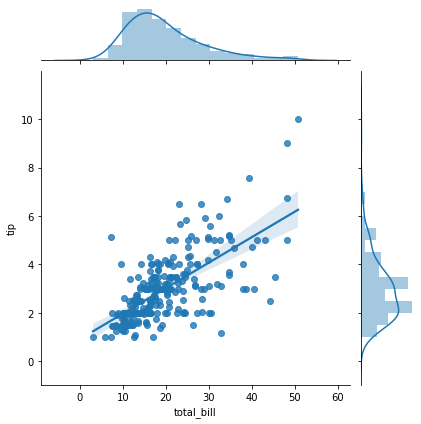

In [129]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

## **Regression Plot**

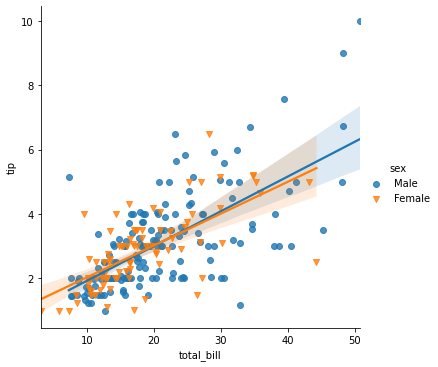

In [135]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex',markers=['o','v'])

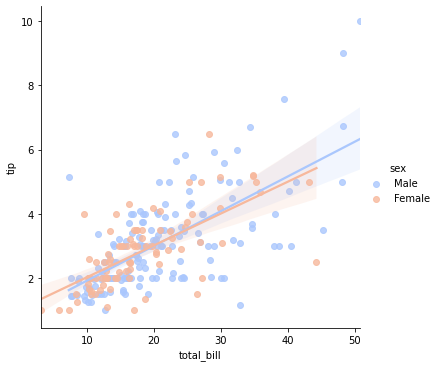

In [136]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

**Working with Markers**

lmplot kwargs get passed through to regplot which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

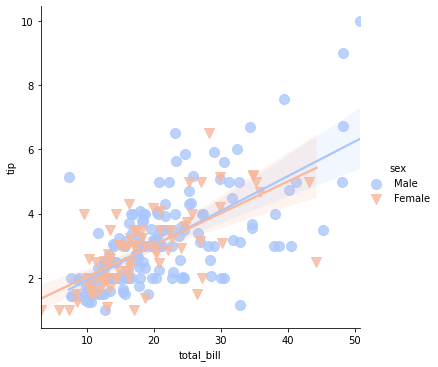

In [137]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

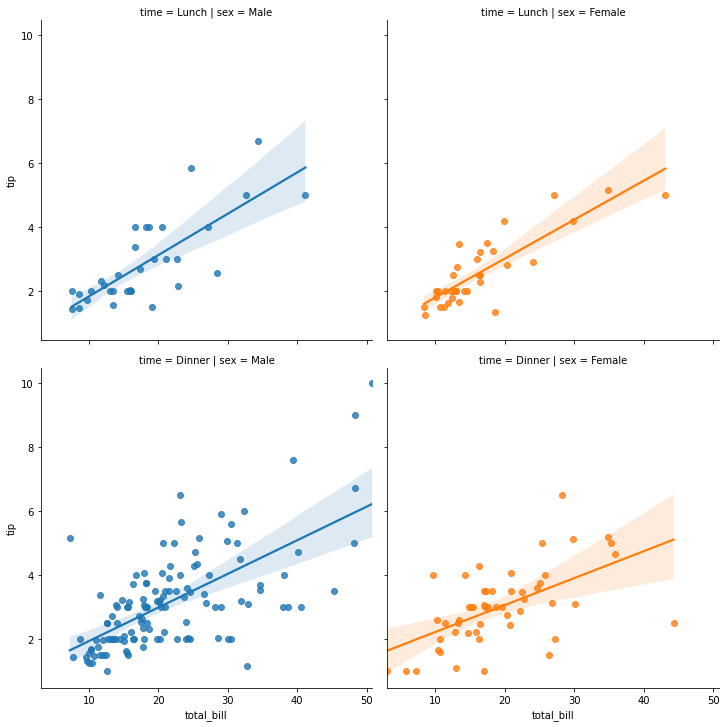

In [142]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time',hue='sex')

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


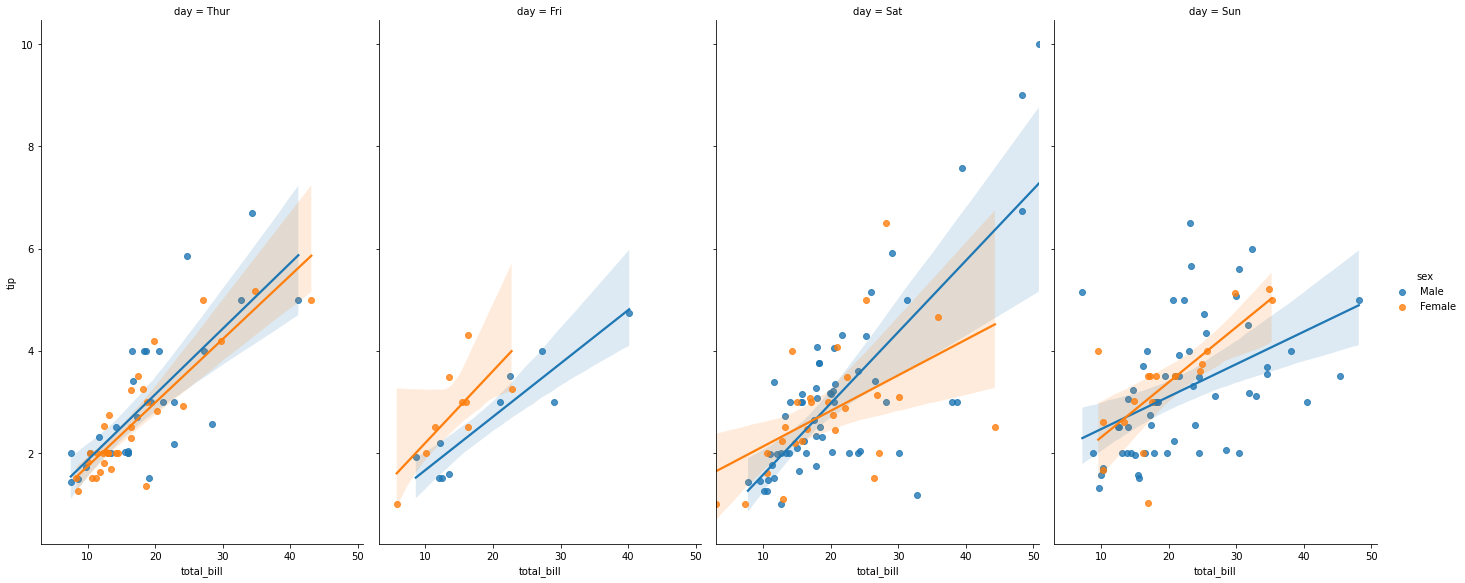

In [144]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,size=8)

## **Style and Color**

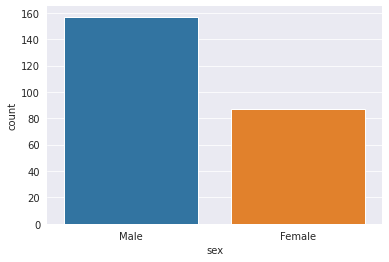

In [154]:
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

**Size and Aspect**

You can use matplotlib's *plt.figure(figsize=(width,height) * to change the size of most seaborn plots.
You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect.

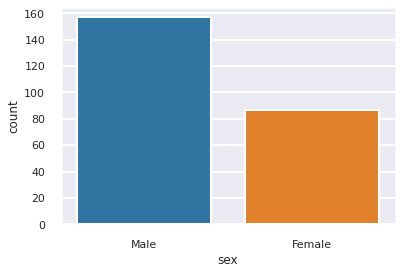

In [162]:
sns.set_context('poster',font_scale=0.5)
sns.countplot(x='sex',data=tips)

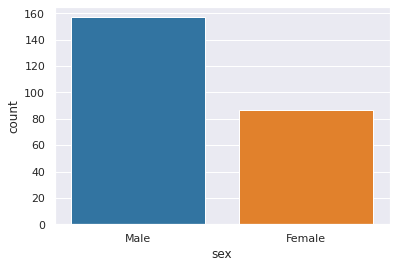

In [165]:
sns.set_context('notebook',font_scale=1)
sns.countplot(x='sex',data=tips)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


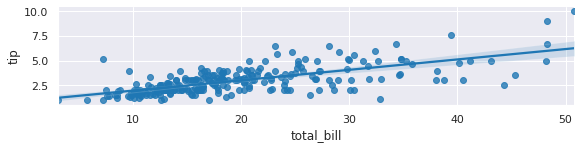

In [166]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)